In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pyrsimg import readTiff, imgShow


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
### region1
path_atl03 = 'data/isat2/region1/processed_ATL03_20190404132847_00960306_006_02.h5'
# path_atl03 = 'data/isat2/processed_ATL03_20190404132847_00960306_006_02.h5'
# path_atl03 = 'data/isat2/processed_ATL03_20190414005617_02410302_006_02.h5'
# path_atl03 = 'data/isat2/processed_ATL03_20190503120445_05380306_006_02.h5'
path_rsimg = 'data/rsimg/region1/region1_l8_20190504_wgs84.tif'


In [4]:
# !h5ls $path_atl13/gt1r/ht_water_surf


In [5]:
# !h5ls $path_atl03
!h5ls $path_atl03/gt1l/heights/lon_ph
# !h5ls $path_atl06/orbit_info


lon_ph                   Dataset {321967/Inf}


In [6]:
beams = ['gt1l','gt1r','gt2l','gt2r','gt3l','gt3r']
atl03_ph = {}
with h5py.File(path_atl03,'r') as setp_atl03:
    for beam in beams:
        atl03_ph[beam+'_lon'] = setp_atl03[beam+'/heights/lon_ph'][:]
        atl03_ph[beam+'_lat'] = setp_atl03[beam+'/heights/lat_ph'][:]
        atl03_ph[beam+'_h'] = setp_atl03[beam+'/heights/h_ph'][:]
        atl03_ph[beam+'_quality'] = setp_atl03[beam+'/heights/quality_ph'][:]
        atl03_ph[beam+'_conf'] = setp_atl03[beam+'/heights/signal_conf_ph'][:]

## 2. remote sensing image
rsimg = readTiff(path_rsimg)


In [11]:
beam_sel = 'gt2l'
ids = np.where(atl03_ph[beam_sel+'_conf'][:,-1]>=2)[0]
print(atl03_ph[beam_sel+'_conf'][:,-1].shape)
print(ids.shape)


(263254,)
(256041,)


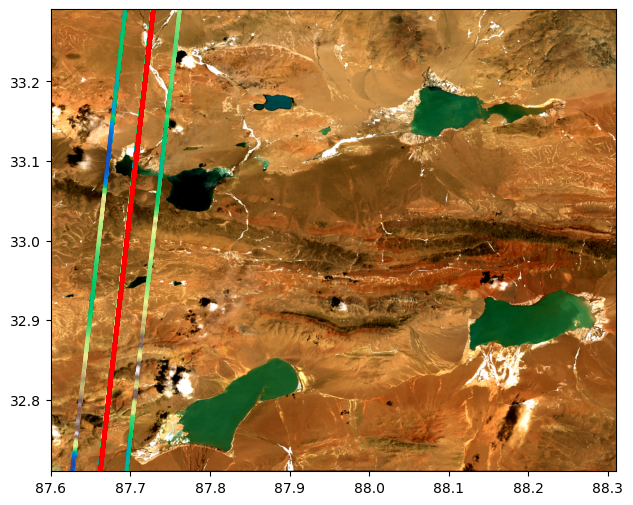

In [12]:
fig = plt.figure(figsize=(12,6))
imgShow(img = rsimg.array, clip_percent=2, extent=rsimg.geoextent)
step = 10
for beam in beams:
  plt.scatter(atl03_ph[beam+'_lon'][::step], atl03_ph[beam+'_lat'][::step], s=2, \
                                    c=atl03_ph[beam+'_h'][::step], alpha=0.1, cmap='terrain')

plt.scatter(atl03_ph[beam_sel+'_lon'][ids][::step], atl03_ph[beam_sel+'_lat'][ids][::step], s=2, c='red')



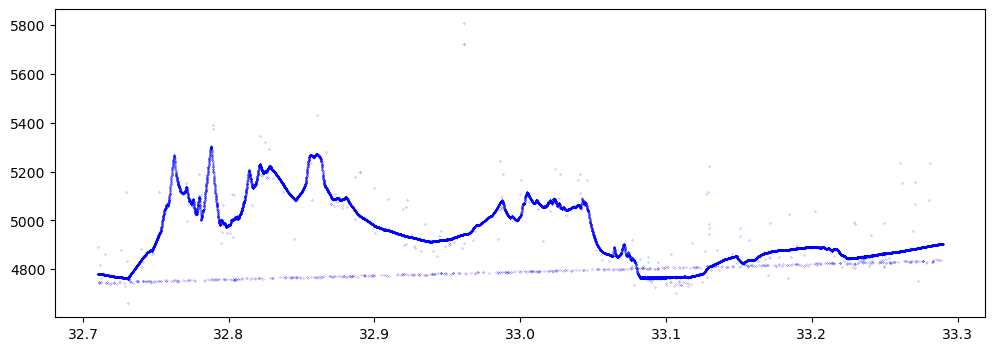

In [13]:
fig = plt.figure(figsize=(12,4))
plt.plot(atl03_ph[beam_sel+'_lat'][::step], atl03_ph[beam_sel+'_h'][::step],  'b.',  markersize=0.3)
# plt.plot(atl03_ph[beam_sel+'_lat'][ids][::step], atl03_ph[beam_sel+'_h'][ids][::step],  'r.',  markersize=0.1)



(4765.4, 4766.2)

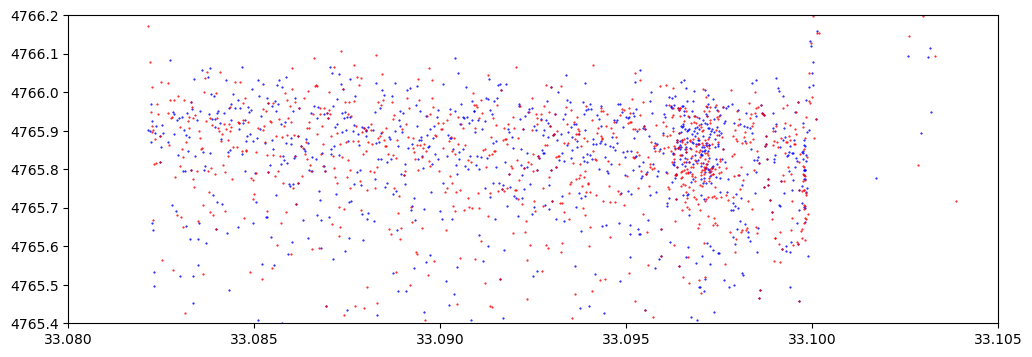

In [20]:
step = 10
fig = plt.figure(figsize=(12,4))
plt.plot(atl03_ph[beam_sel+'_lat'][::step], atl03_ph[beam_sel+'_h'][::step],  'b.',  markersize=1)
plt.plot(atl03_ph[beam_sel+'_lat'][ids][::step], atl03_ph[beam_sel+'_h'][ids][::step],  'r.',  markersize=1)
# plt.xlim(33.1, 33.2); plt.ylim(4736, 4742)  ##  
# plt.xlim(32.84,32.95); 
# plt.ylim(4693, 4696)  ##  beam = 'gt1l'
plt.xlim(33.08, 33.105); plt.ylim(4765.4, 4766.2)  ## beam = 'gt1l'

